In [19]:
# Enabling print for all lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Checking the working directory
import os
os.getcwd()

'C:\\Users\\Administrator\\Python_work\\Edureka'

**`Support Vector Machines`**

- Support Vector Machines is considered to be a classification approach
- It but can be employed in both types of classification and regression problems
- It can easily handle multiple continuous and categorical variables
- SVM constructs a hyperplane in multidimensional space to separate different classes
- SVM generates optimal hyperplane in an iterative manner, which is used to minimize an error
- The core idea of SVM is to find a maximum marginal hyperplane(MMH) that best divides the dataset into classes

**Terms related to SVM**

`Support Vectors`
Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

`Hyperplane`
A hyperplane is a decision plane which separates between a set of objects having different class memberships.

`Margin`
A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin

**`How does SVM work?`**

- The main objective is to segregate the given dataset in the best possible way
- The distance between the either nearest points is known as the margin
- The objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset
- SVM searches for the maximum marginal hyperplane in the following steps:

        1. Generate hyperplanes which segregates the classes in the best way. Left-hand side figure showing three hyperplanes black, blue and orange. Here, the blue and orange have higher classification error, but the black is separating the two classes correctly.

        2. Select the right hyperplane with the maximum segregation from the either nearest data points as shown in the right-hand side figure
        

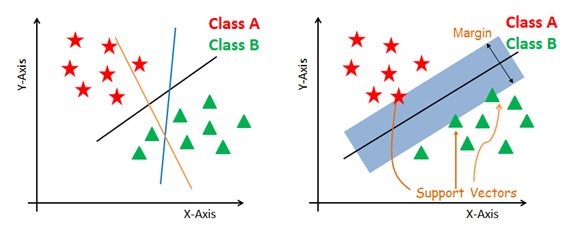

**`Dealing with non-linear and inseparable planes`**

Some problems can’t be solved using linear hyperplane, as shown in the figure below (left-hand side).

        In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space as shown on the right. The data points are plotted on the x-axis and z-axis (Z is the squared sum of both x and y: z=x^2=y^2). Now we can easily segregate these points using linear separation

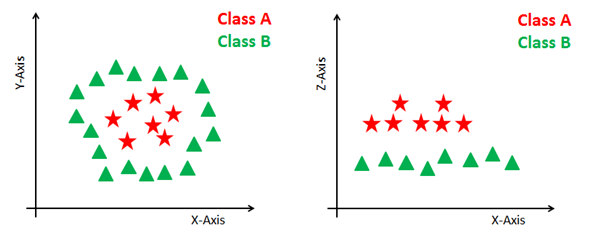

In [16]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn import metrics

In the model the building part, will use the cancer dataset, which is a very famous multi-class classification problem. This dataset is computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

The dataset comprises 30 features

- mean radius, mean texture, mean perimeter, mean area, mean smoothness, mean compactness, mean concavity, mean concave points, mean symmetry, mean fractal dimension, radius error, texture error, perimeter error, area error, smoothness error, compactness error, concavity error, concave points error, symmetry error, fractal dimension error, worst radius, worst texture, worst perimeter, worst area, worst smoothness, worst compactness, worst concavity, worst concave points, worst symmetry, and worst fractal dimension and
- target (type of cancer)

This data has two types of cancer classes: `malignant (harmful)` and `benign (not harmful)`. Here, we build a model to classify the type of cancer. The dataset is available in the scikit-learn library or you can also download it from the UCI Machine Learning Library

In [9]:
# Load dataset
cancer = datasets.load_breast_cancer()
type(cancer)

sklearn.utils.Bunch

In [3]:
# Print the names of the 13 features
print("Features: ", cancer.feature_names)

# Print the label type of cancer('malignant' 'benign')
print("Labels: ", cancer.target_names)

Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [4]:
# Print the cancer data features(top 5 records)
print(cancer.data[0:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

In [10]:
# Print the cancer labels(0:malignant, 1:benign)
print(cancer.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.3,random_state=109)

**[SVM Scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)**

In [14]:
# Create a svm Classifier and train it using the training data
clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [17]:
# Model Accuracy: how often is the classifier correct
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9649122807017544


In [18]:
# Model Precision: what percentage of positive tuples are labeled as such
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such
print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.9811320754716981
Recall: 0.9629629629629629


**Tuning Hyperparameters**

`Kernel`
- The main function of the kernel is to transform the given dataset input data into the required form
- There are various types of functions such as linear, polynomial, and radial basis function (RBF)
- Polynomial and RBF are useful for non-linear hyperplane
- Polynomial and RBF kernels compute the separation line in the higher dimension
- In some of the use cases, it is suggested to use a more complex kernel to separate the classes that are curved or nonlinear - - This transformation can lead to more accurate classifiers

`Regularization`
- Regularization parameter in python's Scikit-learn C parameter used to maintain regularization
- Here C is the penalty parameter, which represents misclassification or error term
- The misclassification or error term tells the SVM optimization how much error is bearable
- This is how you can control the trade-off between decision boundary and misclassification term
- A smaller value of C creates a small-margin hyperplane and a larger value of C creates a larger-margin hyperplane

`Gamma`
- A lower value of Gamma will loosely fit the training dataset, whereas a higher value of gamma will exactly fit the training dataset, which causes over-fitting
- In other words, you can say a low value of gamma considers only nearby points in calculating the separation line, while the a value of gamma considers all the data points in the calculation of the separation line

**`Advantages`**

- SVM Classifiers offer good accuracy and perform faster prediction compared to Naïve Bayes algorithm
- They also use less memory because they use a subset of training points in the decision phase
- SVM works well with a clear margin of separation and with high dimensional space

**`Disadvantages`**

- SVM is not suitable for large datasets because of its high training time and it also takes more time in training compared to Naïve Bayes
- It works poorly with overlapping classes and is also sensitive to the type of kernel used

**`SVM Kernels`**

1. The SVM algorithm is implemented in practice using a kernel
2. A kernel transforms an input data space into the required form
3. SVM uses a technique called the kernel trick
4. Here, the kernel takes a low-dimensional input space and transforms it into a higher dimensional space
5. In other words, you can say that it converts nonseparable problem to separable problems by adding more dimension to it
6. It is most useful in non-linear separation problem
7. Kernel trick helps you to build a more accurate classifier

`Linear Kernel` A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values

                    `K(x, xi) = sum(x * xi)`

`Polynomial Kernel` A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space

                    `K(x,xi) = 1 + sum(x * xi)^d`
                    
Where d is the degree of the polynomial. d=1 is similar to the linear transformation
The degree needs to be manually specified in the learning algorithm

`Radial Basis Function` Kernel The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in infinite dimensional space

                     `K(x,xi) = exp(-gamma * sum((x – xi^2))`